# Content-based image retrieval 

In [5]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [6]:
%cd /content/drive/MyDrive/Image_Retrieval

/content/drive/MyDrive/Image_Retrieval


### Import required libraries

In [33]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

import cv2
from skimage.feature import greycomatrix, greycoprops

from lfw_dataset import load_lfw_dataset

### Load and process data

In [ ]:

# Load LFW dataset and extract features
X, attr = load_lfw_dataset(use_raw=True, dimx=32, dimy=32)
num_images = X.shape[0]

img_list = []
color_features = []
texture_features = []

for i in range(num_images):
    # Load image and resize to desired size
    img_arr = X[i]

    # Extract color histogram features
    hsv = cv2.cvtColor(img_arr, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, [8, 2, 2], [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    color_features.append(hist)

    # Extract texture features using GLCM (Gray-Level Co-occurrence Matrix)
    gray = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    glcm = greycomatrix(gray, [5], [0], symmetric=True, normed=True)
    texture = np.mean([greycoprops(glcm, 'contrast'), greycoprops(glcm, 'homogeneity'), greycoprops(glcm, 'energy'), greycoprops(glcm, 'correlation')])
    texture_features.append(texture)

    img_list.append(img_arr)

# Stack color and texture features into a single feature vector
features = np.hstack((np.array(color_features), np.array(texture_features).reshape(-1, 1)))


### KNN

In [35]:
# Fit a k-NN model on the feature vectors
knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
knn.fit(features)

NearestNeighbors(metric='euclidean')

### Testing with a query image

In [36]:
# Query for similar images using a new image
query_img_path = '/content/Jim_OBrien_0001.jpg'  # replace with your own query image path
query_img = load_img(query_img_path, target_size=(32, 32))
query_img_arr = img_to_array(query_img)
query_color = cv2.calcHist([cv2.cvtColor(query_img_arr, cv2.COLOR_BGR2HSV)], [0, 1, 2], None, [8, 2, 2], [0, 180, 0, 256, 0, 256])
query_color = cv2.normalize(query_color, query_color).flatten()
query_texture = np.mean([greycoprops(greycomatrix(cv2.convertScaleAbs(cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)), [5], [0], symmetric=True, normed=True), 'contrast'), greycoprops(greycomatrix(cv2.convertScaleAbs(cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)), [5], [0], symmetric=True, normed=True), 'energy'), greycoprops(greycomatrix(cv2.convertScaleAbs(cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)), [5], [0], symmetric=True, normed=True), 'correlation')])
query_features = np.hstack((query_color, query_texture)).reshape(1, -1)

distances, indices = knn.kneighbors(query_features)


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skim

### display the image

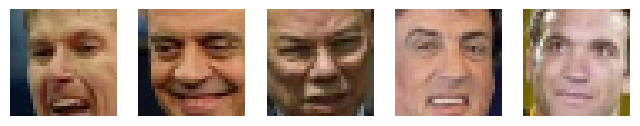

In [37]:
fig, ax = plt.subplots(1, 5, figsize=(8,7))

# Display the most similar images
for i in range(len(indices[0])):
    img_idx = indices[0][i]
    img = img_list[img_idx]
    ax[i].imshow(img)
    ax[i].axis('off')

plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()